In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
import openpyxl
warnings.filterwarnings('ignore')
%matplotlib inline


In [8]:
df = pd.read_excel("../Data/fp-historical-wildfire-data-2006-2021.xlsx")

# EDA

In [ ]:
df.columns


Index(['fire_year', 'fire_number', 'fire_name', 'current_size', 'size_class',
       'fire_location_latitude', 'fire_location_longitude', 'fire_origin',
       'general_cause_desc', 'industry_identifier_desc',
       'responsible_group_desc', 'activity_class', 'true_cause',
       'fire_start_date', 'det_agent', 'det_agent_type', 'discovered_date',
       'discovered_size', 'reported_date', 'dispatched_resource',
       'dispatch_date', 'start_for_fire_date', 'assessment_resource',
       'assessment_datetime', 'assessment_hectares', 'fire_spread_rate',
       'fire_type', 'fire_position_on_slope', 'weather_conditions_over_fire',
       'temperature', 'relative_humidity', 'wind_direction', 'wind_speed',
       'fuel_type', 'initial_action_by', 'ia_arrival_at_fire_date',
       'ia_access', 'fire_fighting_start_date', 'fire_fighting_start_size',
       'bucketing_on_fire', 'distance_from_water_source',
       'first_bucket_drop_date', 'bh_fs_date', 'bh_hectares', 'uc_fs_date',
       'u

In [ ]:
df.head(5)

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,NaT,2021-06-28 22:26:00,0.01,2021-07-01 13:26:00,10.00,NaT,NaN,2021-07-01 13:44:00,5.50
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,NaT,2021-03-30 14:30:00,0.01,2021-03-30 14:30:00,0.01,2021-03-30 14:35:00,0.01,2021-04-09 08:30:00,0.01
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,NaT,2021-04-16 16:57:00,0.10,2021-04-16 16:57:00,0.10,NaT,NaN,2021-04-17 14:15:00,0.10
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,NaT,2021-04-17 15:20:00,0.01,2021-04-17 15:20:00,0.01,NaT,NaN,2021-04-17 15:24:00,0.01
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,NaT,2021-04-01 19:10:00,7.13,2021-04-02 11:00:00,7.13,2021-04-02 15:52:00,7.13,2021-04-12 14:30:00,7.13


In [ ]:
#missing data
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
discovered_size,22914,1.000000
industry_identifier_desc,22506,0.982194
fire_name,22310,0.973641
to_hectares,20470,0.893340
to_fs_date,20470,0.893340
distance_from_water_source,16549,0.722222
first_bucket_drop_date,16549,0.722222
responsible_group_desc,13883,0.605874
ia_access,12838,0.560269
true_cause,10426,0.455006


In [ ]:
# first_year: The wildfire year runs from 00:00 hours on April 1 until 23:59 hours on March 31. The fire year is named for the year
# in which April 1 falls. For example, the 2013 fire year begins April 1, 2013 and ends March 31, 2014.

In [ ]:
# From 2006 -> 2021
df['fire_year']

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
22909    2006
22910    2006
22911    2006
22912    2006
22913    2006
Name: fire_year, Length: 22914, dtype: int64

In [ ]:
# fire_number. the code for the forest
pd.unique(df['fire_number'])
# Define the mapping from the first character to Forest Service Area (FSA)
fsa_map = {
    'C': 'Calgary',
    'E': 'Edson',
    'H': 'High Level',
    'G': 'Grande Prairie',
    'L': 'Lac La Biche',
    'M': 'Fort McMurray',
    'P': 'Peace River',
    'R': 'Rocky',
    'S': 'Slave Lake',
    'W': 'Whitecourt'
}

# Create a new column 'FSA' by mapping the first character of 'fire_number'
df['FSA'] = df['fire_number'].apply(lambda x: fsa_map.get(x[0], 'Unknown'))

df['FSA']

0           High Level
1                Rocky
2         Lac La Biche
3        Fort McMurray
4                Edson
             ...      
22909          Calgary
22910          Calgary
22911          Calgary
22912          Calgary
22913    Fort McMurray
Name: FSA, Length: 22914, dtype: object

count     22914.000000
mean        155.060680
std        5906.681475
min           0.010000
25%           0.010000
50%           0.020000
75%           0.300000
max      577646.800000
Name: current_size, dtype: float64


<Axes: xlabel='current_size', ylabel='Density'>

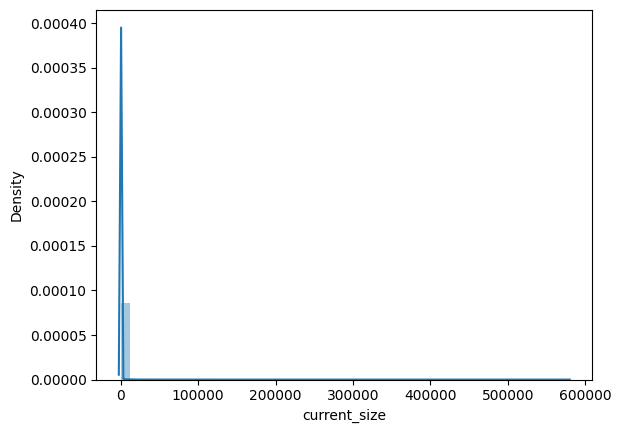

In [ ]:
# current_size
print(df['current_size'].describe())
sns.distplot(df['current_size'])

5. field name: size_class:
This is a grouping of wildfires into classes based on final area burned. Size class can change as the wildfire grows
until the final area burned is determined after extinguishment.
The breakdown is as follows:
A class = 0 to 0.1 ha
B class > 0.1 ha to 4.0 ha
C class > 4.0 ha to 40.0 ha
D class > 40.0 ha to 200 ha
E class > 200 ha

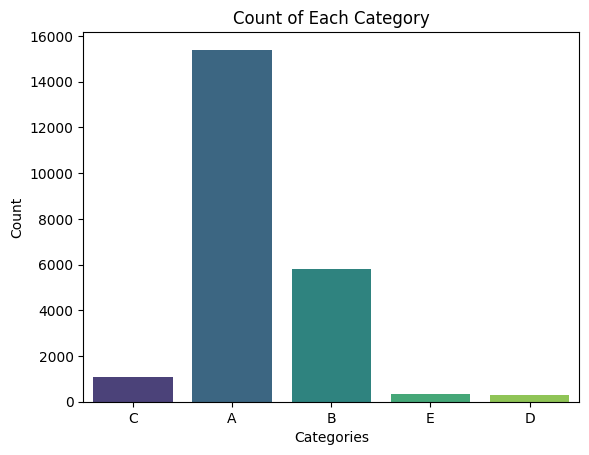

In [ ]:
# size_class
pd.unique(df['size_class'])
df['size_class'].describe()
# Create a count plot for a size_class column
sns.countplot(data=df, x='size_class', palette='viridis')
sns.set_style('whitegrid')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Each Category')
plt.show()

6. field name: fire_location_latitude
7. field name: fire_location_longitude

Location of the ignition area of the wildfire recorded as a GPS (recorded as decimal degrees (DD).
The location is originally captured during the assessment but may be further investigated as the wildfire progresses.
The final location is the confirmed ignition area of the wildfire.

In [ ]:
# fire_location_latitude + fire_location_longitude
# Count missing values for each column
missing_values_per_column = df['fire_location_latitude'].isna().sum()
# Print the number of missing values for each column
print("Number of missing values for fire_location_latitude:")
print(missing_values_per_column)

missing_values_per_column = df['fire_location_longitude'].isna().sum()
# Print the number of missing values for each column
print("Number of missing values for fire_location_longitude:")
print(missing_values_per_column)

Number of missing values for fire_location_latitude:
0
Number of missing values for fire_location_longitude:
0


8. field name: fire_origin
This indicates who owns or administers the land the wildfire is burning on. If the wildfire covers more than one origin,
this will be the land where the ignition area of the wildfire is.
Provincial Private Indian Reserve
Provincial Park Daprtment of National Defence Metis Settlement


9. field name: general_cause_description
Classification of the wildfire cause according to the general group, individual industry or ignition source (for lightning)
that started the wildfire.
For wildfires that are currently being investigated, the temporary general cause of UNDER INVESTIGATION is used.

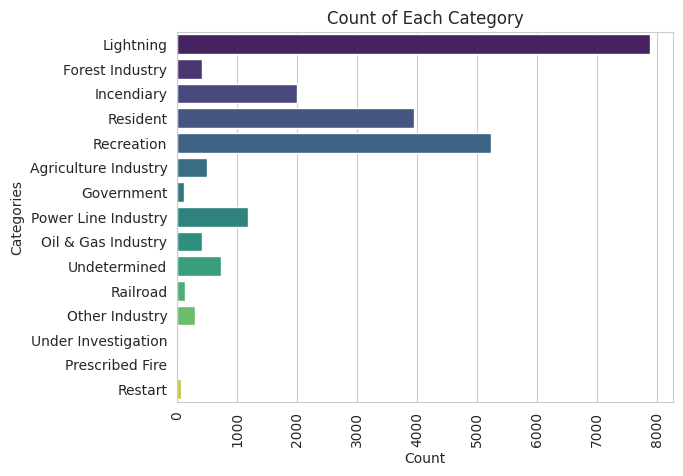

Number of missing values for general_cause_desc:
0


In [ ]:
# Create a count plot for the 'general_cause_desc' column
sns.countplot(data=df, y='general_cause_desc', palette='viridis')
sns.set_style('whitegrid')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.ylabel('Categories')
plt.xlabel('Count')
plt.title('Count of Each Category')
plt.show()

missing_values_per_column = df['general_cause_desc'].isna().sum()
# Print the number of missing values for each column
print("Number of missing values for general_cause_desc:")
print(missing_values_per_column)

10. field name: industry_identifier_desc

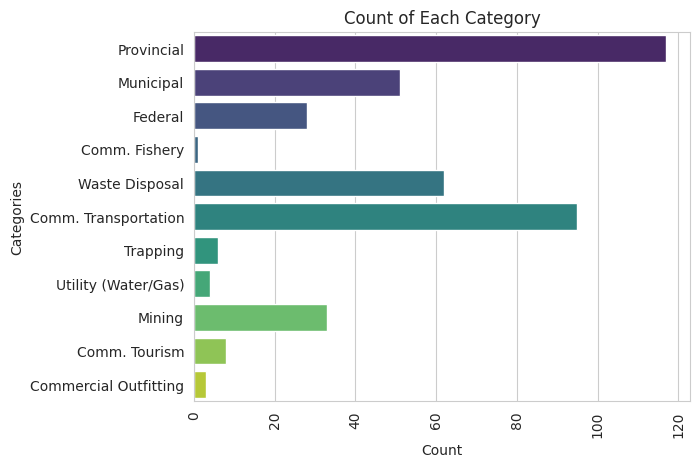

Number of missing values for industry_identifier_desc:
22506


In [ ]:
# Create a count plot for the 'industry_identifier_desc' column
sns.countplot(data=df, y='industry_identifier_desc', palette='viridis')
sns.set_style('whitegrid')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.ylabel('Categories')
plt.xlabel('Count')
plt.title('Count of Each Category')
plt.show()

missing_values_per_column = df['industry_identifier_desc'].isna().sum()
# Print the number of missing values for each column
print("Number of missing values for industry_identifier_desc:")
print(missing_values_per_column)

11. field name: responsible_group_desc
For the general cause of Recreation, identify the recreational group responsible for causing the wildfire.
• campers (includes day use)
• hunters
• other

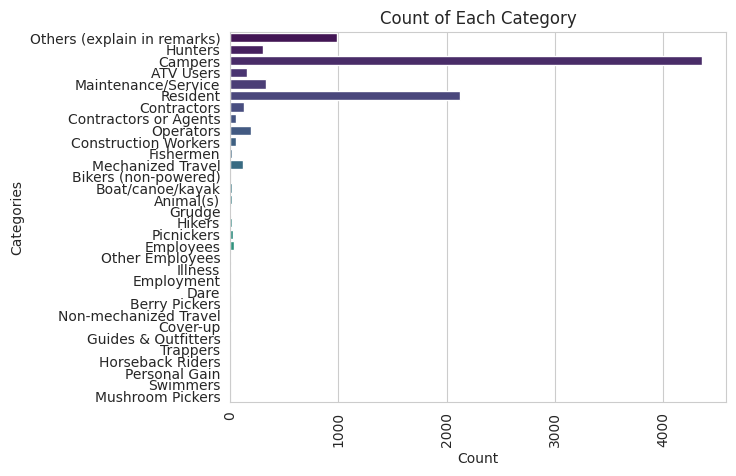

Number of missing values for responsible_group_desc:
13883


In [ ]:
# Create a count plot for the 'responsible_group_desc' column
sns.countplot(data=df, y='responsible_group_desc', palette='viridis')
sns.set_style('whitegrid')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.ylabel('Categories')
plt.xlabel('Count')
plt.title('Count of Each Category')
plt.show()

missing_values_per_column = df['responsible_group_desc'].isna().sum()
# Print the number of missing values for each column
print("Number of missing values for responsible_group_desc:")
print(missing_values_per_column)

12. field name: activity_class
Identifies the specific activity that was going on when the wildfire was started.

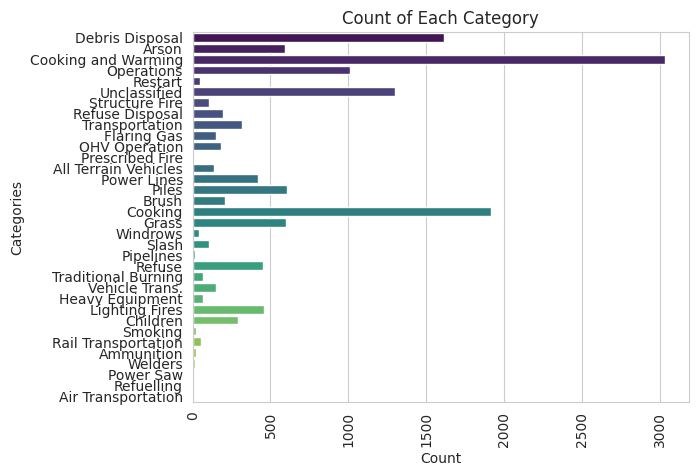

Number of missing values for activity_class:
8710


In [ ]:
# Create a count plot for the 'activity_class' column
sns.countplot(data=df, y='activity_class', palette='viridis')
sns.set_style('whitegrid')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.ylabel('Categories')
plt.xlabel('Count')
plt.title('Count of Each Category')
plt.show()

missing_values_per_column = df['activity_class'].isna().sum()
# Print the number of missing values for each column
print("Number of missing values for activity_class:")
print(missing_values_per_column)

13. field name: true_cause
Identifies the specific reason why the wildfire started.

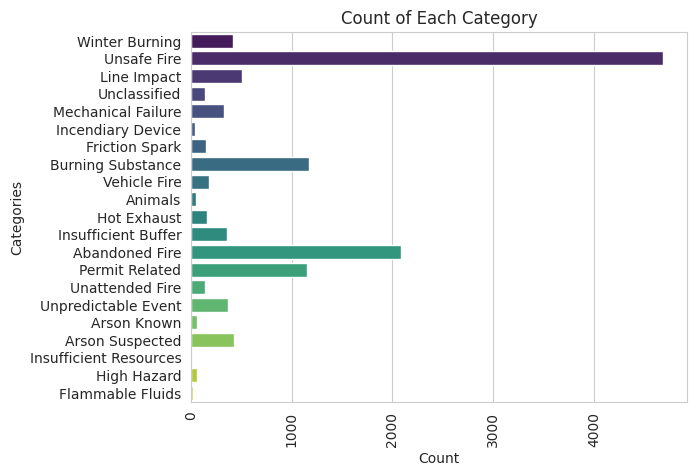

Number of missing values for true_cause:
10426


In [ ]:
# Create a count plot for the 'true_cause' column
sns.countplot(data=df, y='true_cause', palette='viridis')
sns.set_style('whitegrid')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.ylabel('Categories')
plt.xlabel('Count')
plt.title('Count of Each Category')
plt.show()

missing_values_per_column = df['true_cause'].isna().sum()
# Print the number of missing values for each column
print("Number of missing values for true_cause:")
print(missing_values_per_column)

14. field name: fire_start_date
The time and date the wildfire started.
If the exact time and date is unknown, an estimate is made of the wildfire start time.
Actual start time can be obtained by storm tracking, a witness or statement from the responsible party. Start time for
lightning-caused wildfires can be estimated from lightning map data.

15. field name: det_agent
A more specific description of the detection agent that discovered the wildfire.

In [ ]:
# Create a count plot for the 'true_cause' column


missing_values_per_column = df['det_agent'].isna().sum()
# Print the number of missing values for each column
print("Number of missing values for det_agent:")
print(missing_values_per_column)

Number of missing values for det_agent:
1


16. field name: discovered_date
The time the detection agent first discovered the wildfire.
This field is mandatory for all detection agents except unplanned, therefore, this field may be blank on those wildfires.

17. field name: det_agent_type
The general type of detection agent responsible for discovering the wildfire.
LKT – lookout
AIR – air patrol
GRP – ground patrol
UNP - unplanned

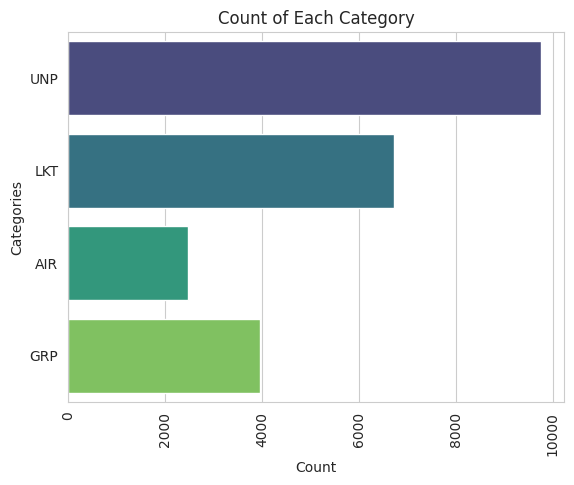

Number of missing values for det_agent_type:
1


In [ ]:
# Create a count plot for the 'det_agent_type' column
sns.countplot(data=df, y='det_agent_type', palette='viridis')
sns.set_style('whitegrid')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.ylabel('Categories')
plt.xlabel('Count')
plt.title('Count of Each Category')
plt.show()

missing_values_per_column = df['det_agent_type'].isna().sum()
# Print the number of missing values for each column
print("Number of missing values for det_agent_type:")
print(missing_values_per_column)

18. field name: discovered_size
The size of wildfire when first discovered by the detection agent.

Target Variables

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: discovered_size, dtype: float64
Number of missing values for discovered_size:
22914


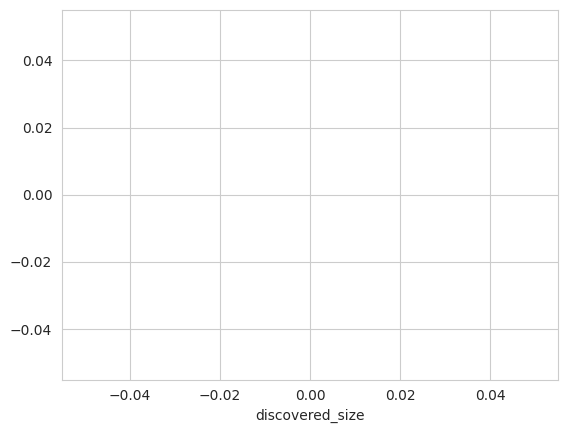

In [ ]:
# discovered_size
print(df['discovered_size'].describe())
sns.distplot(df['discovered_size'])

missing_values_per_column = df['discovered_size'].isna().sum()
# Print the number of missing values for each column
print("Number of missing values for discovered_size:")
print(missing_values_per_column)

19. field name: reported_date
The time and date the wildfire was first reported to Wildfire Management. This is generally the time the discovery agent
calls the Area dispatch.
The report time can be the same as the discovery time.

41. field name: distance_from_water_source
If a helicopter with a bucket was used during initial action of the wildfire, record the distance in kilometers (to the nearest
tenth) that the rotor wing flew from the water source to the wildfire.

count    6365.000000
mean        2.648594
std        21.405949
min         0.000000
25%         0.500000
50%         1.000000
75%         2.000000
max       700.000000
Name: distance_from_water_source, dtype: float64


<Axes: xlabel='distance_from_water_source', ylabel='Density'>

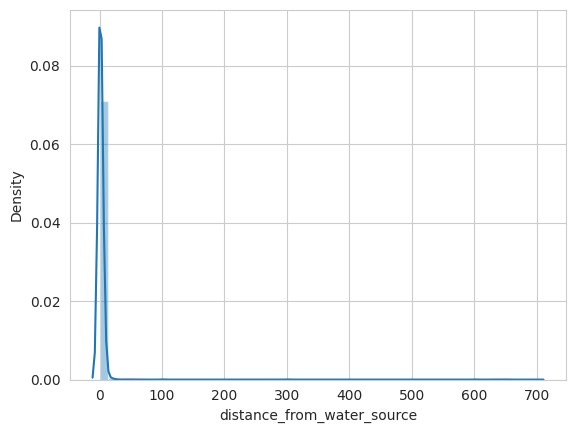

In [ ]:

# distance to Water
# current_size
print(df['distance_from_water_source'].describe())
sns.distplot(df['distance_from_water_source'])

# Question 1

<Axes: >

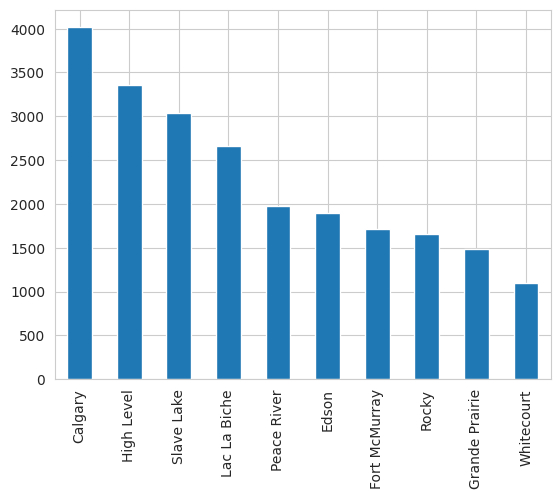

In [ ]:
df['FSA'].value_counts().plot(kind = 'bar')

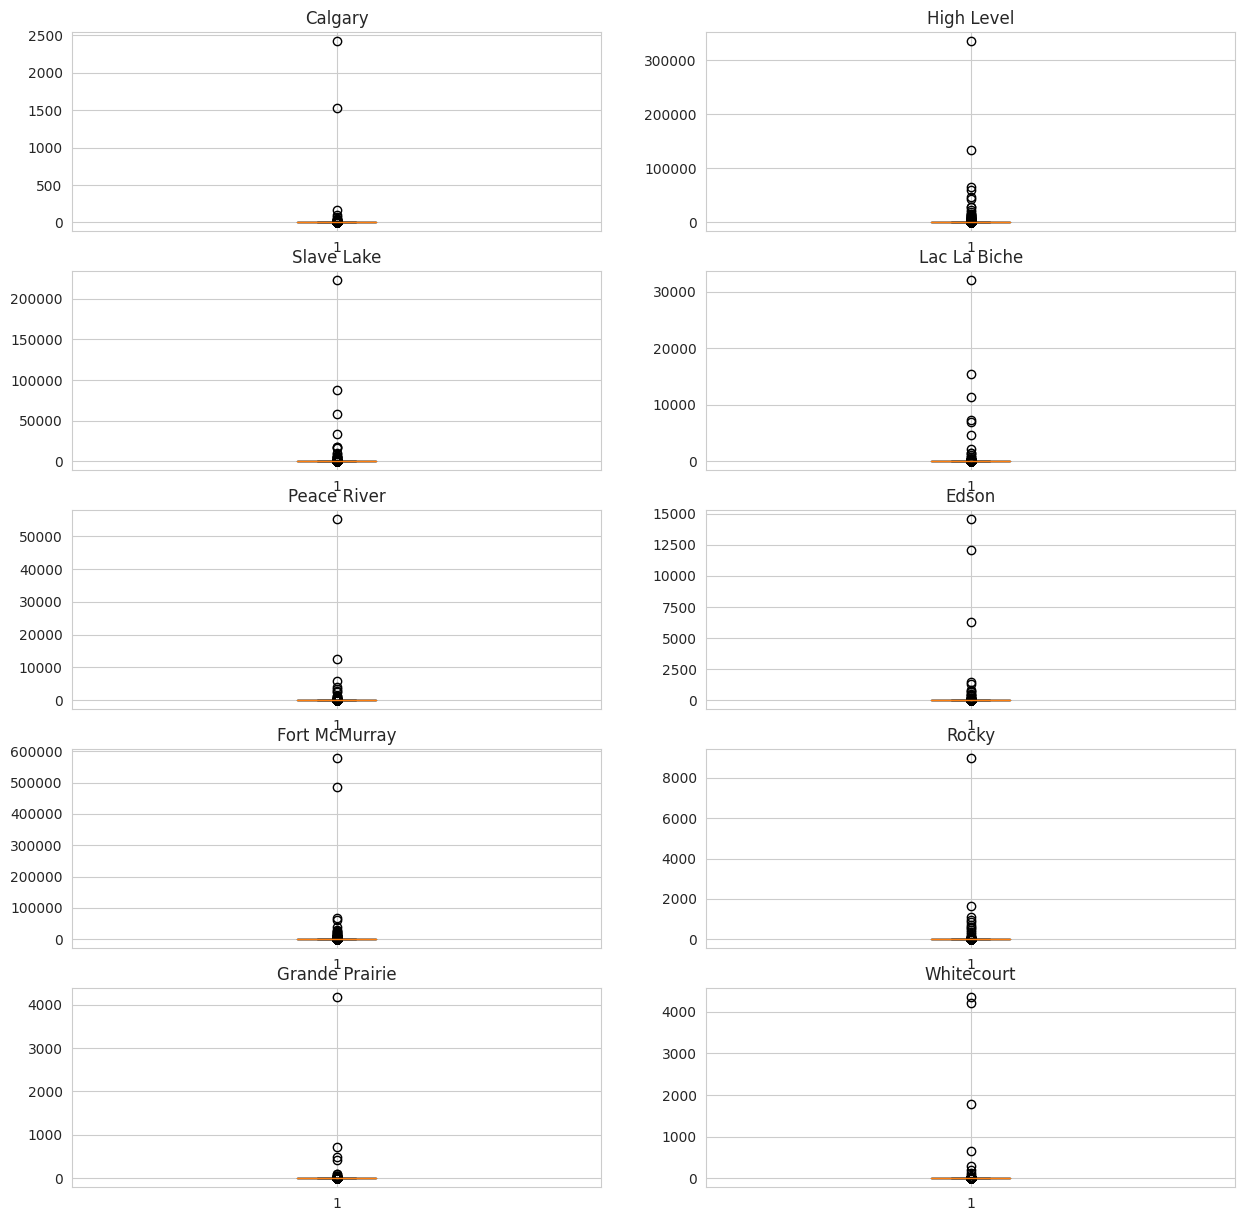

In [ ]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)
fig.set_figheight(15)
fig.set_figwidth(15)

row, col = 0, 0
for region in df['FSA'].value_counts().index:
    temp = df[df['FSA'] == region]
    axes[row, col].boxplot(temp['current_size'])
    axes[row, col].title.set_text(region)
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1

# Question 2
What are the main reasons that usually cause the wildfires near each vulnerable FSA region

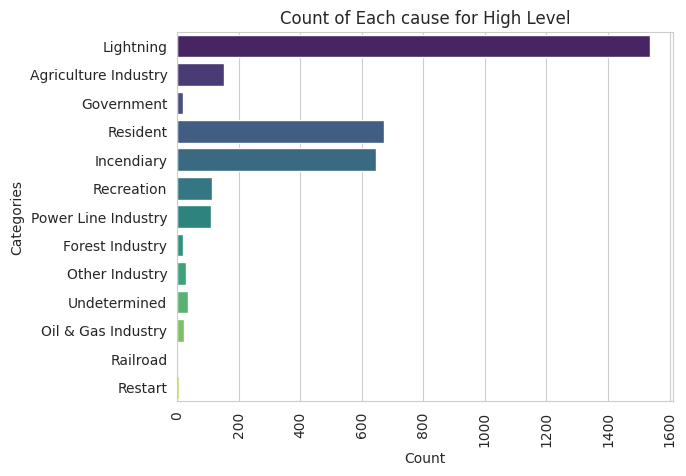

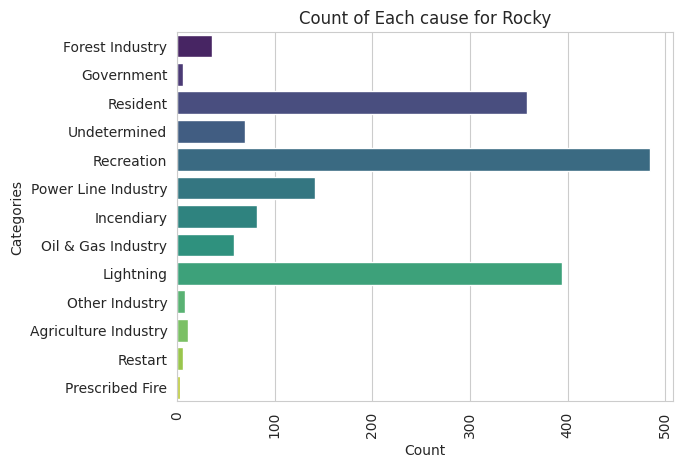

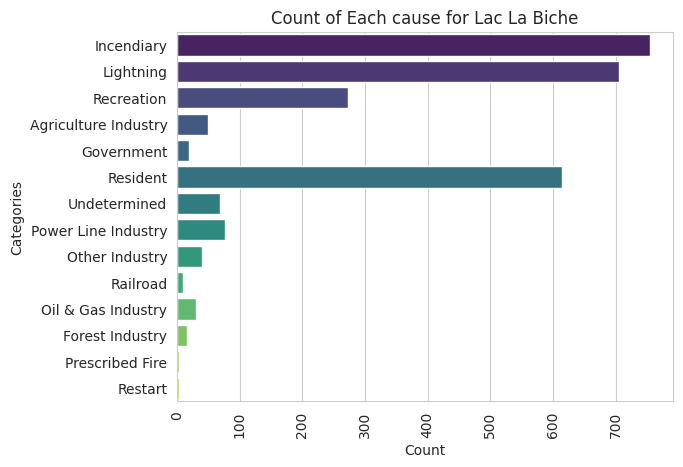

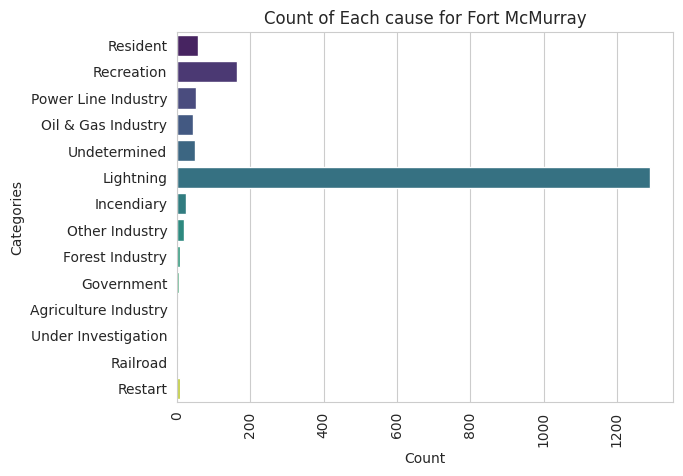

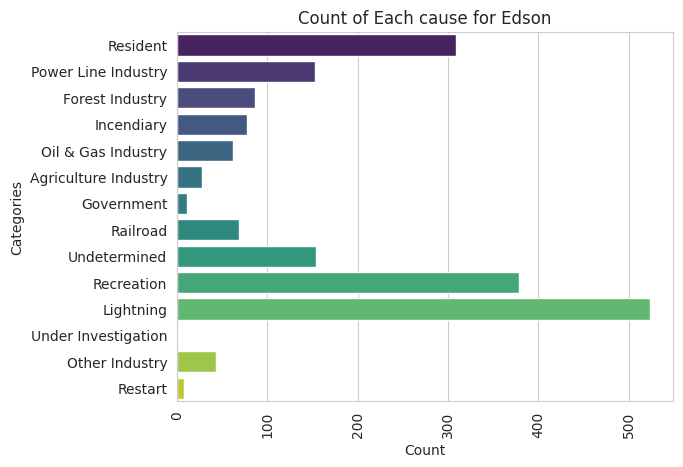

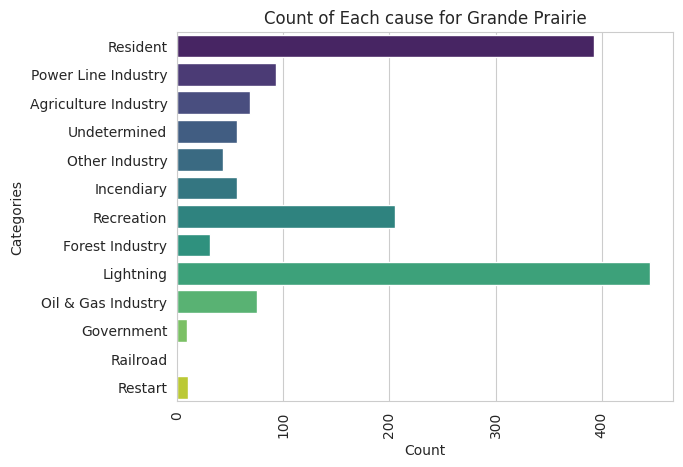

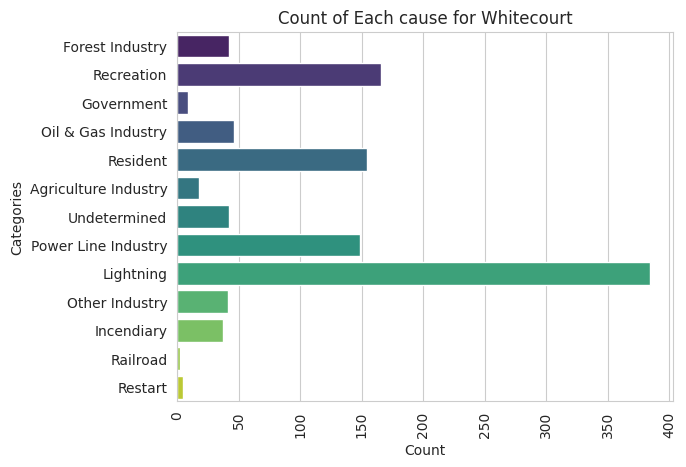

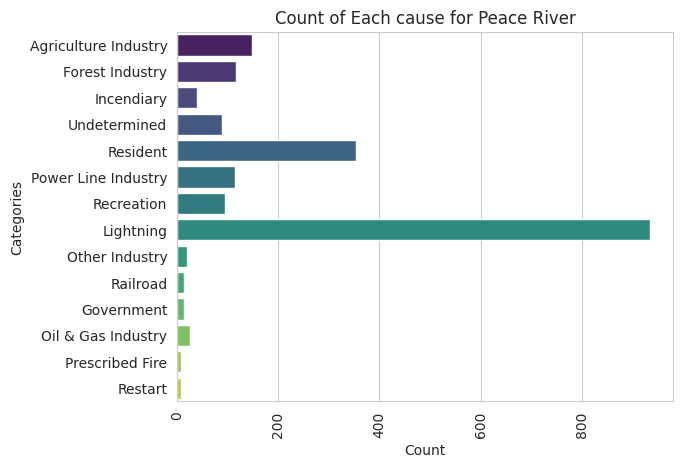

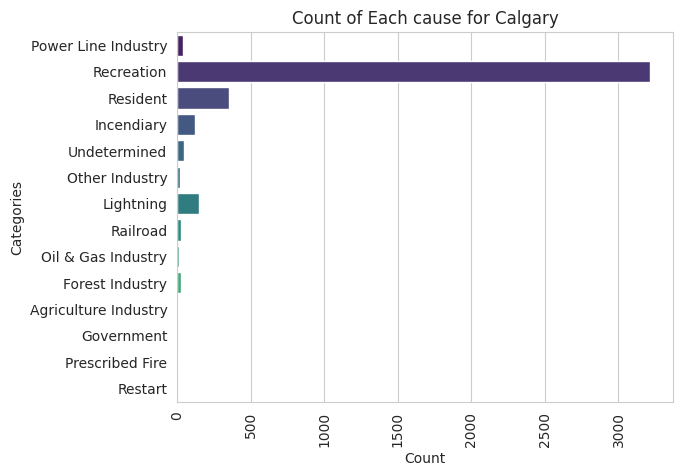

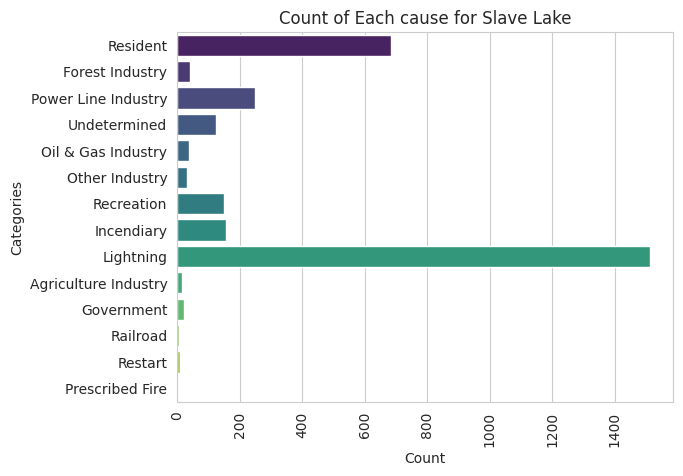

In [ ]:
# First way to look at is the col general_cause_description
# Create a count plot for the 'general_cause_desc' column
FSA_region = pd.unique(df['FSA'])
# We need to use the results from Q1 to shortlist the region

# feature one : general_cause_desc
for region in FSA_region:
  sns.countplot(data=df[df['FSA']==region], y='general_cause_desc', palette='viridis')
  sns.set_style('whitegrid')

  # Rotate x-axis labels vertically
  plt.xticks(rotation=90)

  plt.ylabel('Categories')
  plt.xlabel('Count')
  plt.title('Count of Each cause for {}'.format(region))
  plt.show()



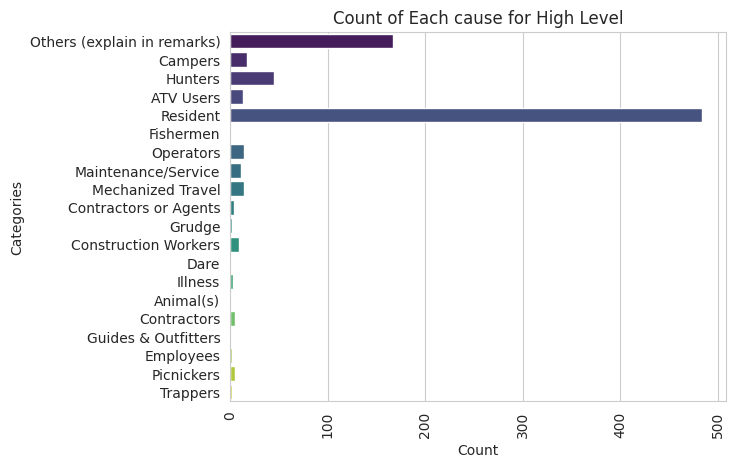

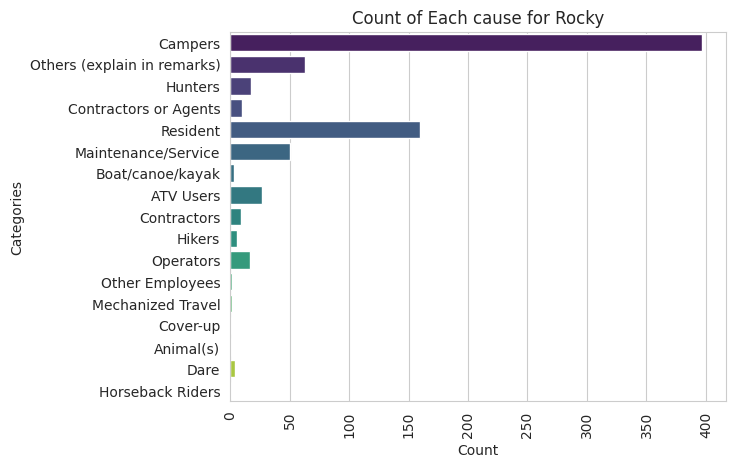

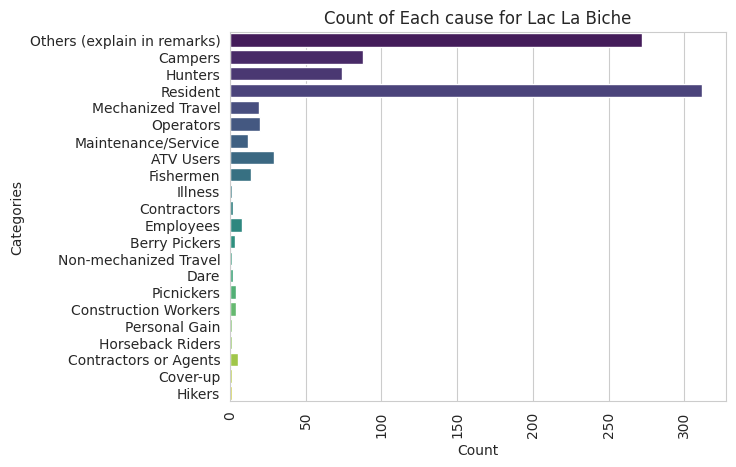

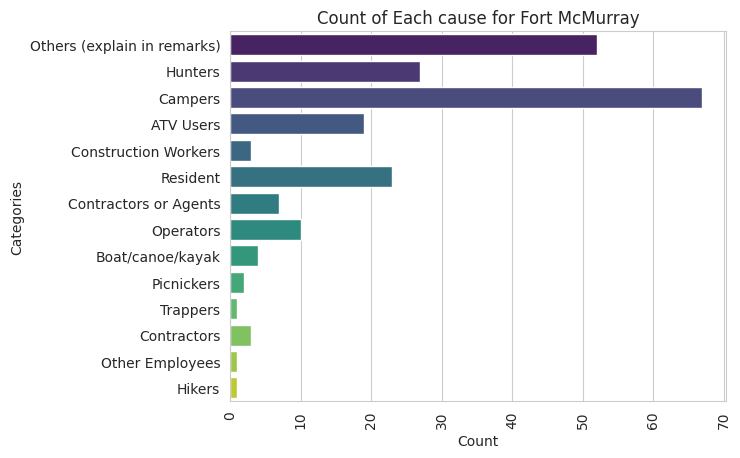

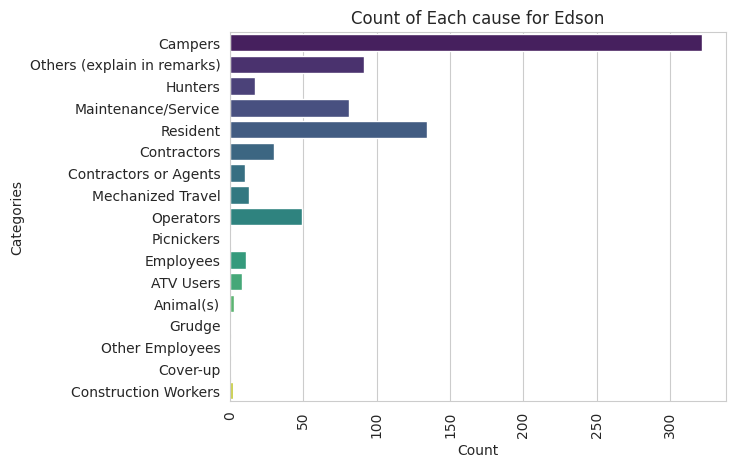

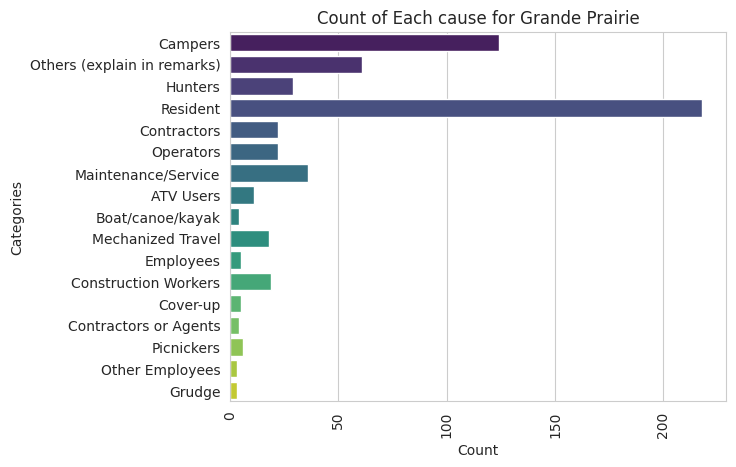

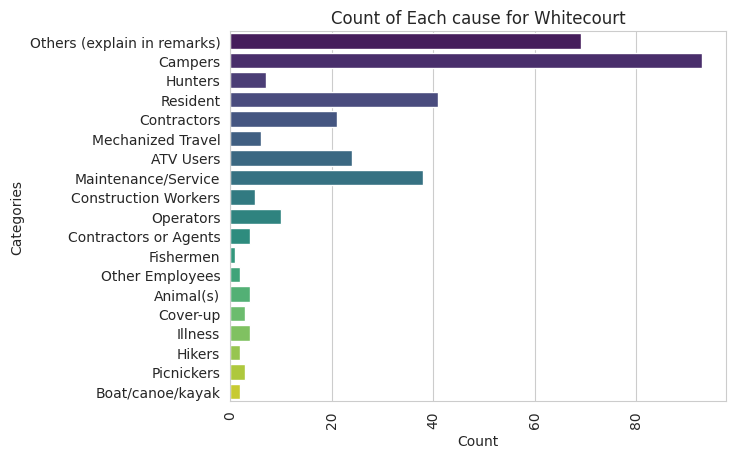

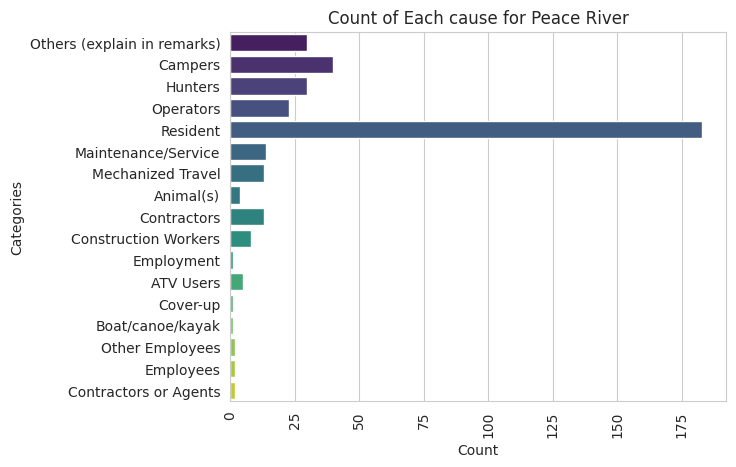

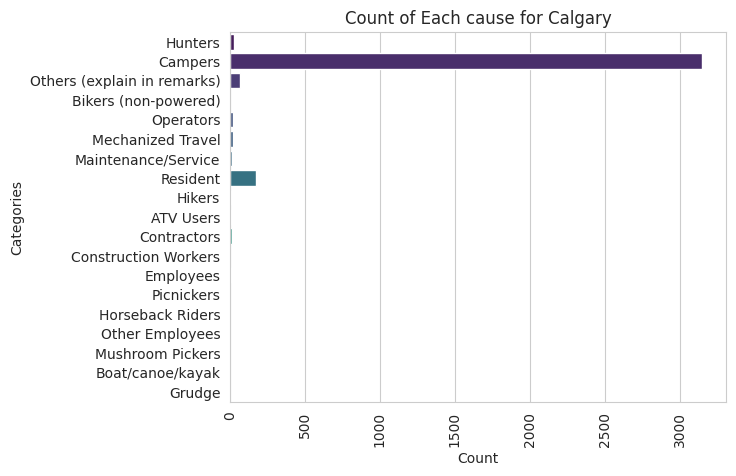

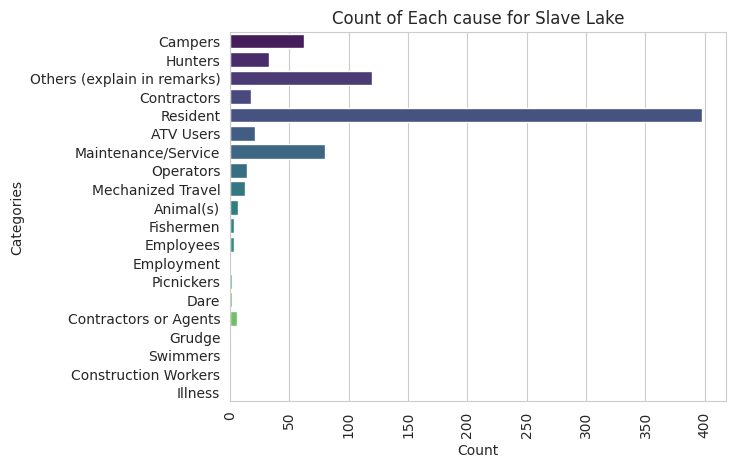

In [ ]:
# feature two : responsible_group_desc
for region in FSA_region:
  sns.countplot(data=df[df['FSA']==region], y='responsible_group_desc', palette='viridis')
  sns.set_style('whitegrid')

  # Rotate x-axis labels vertically
  plt.xticks(rotation=90)

  plt.ylabel('Categories')
  plt.xlabel('Count')
  plt.title('Count of Each cause for {}'.format(region))
  plt.show()

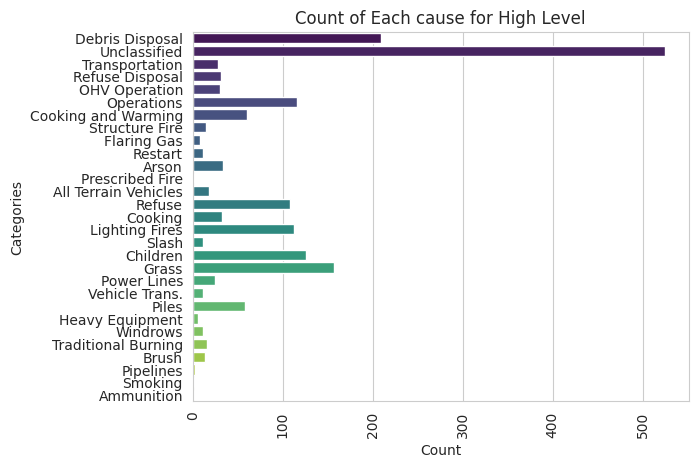

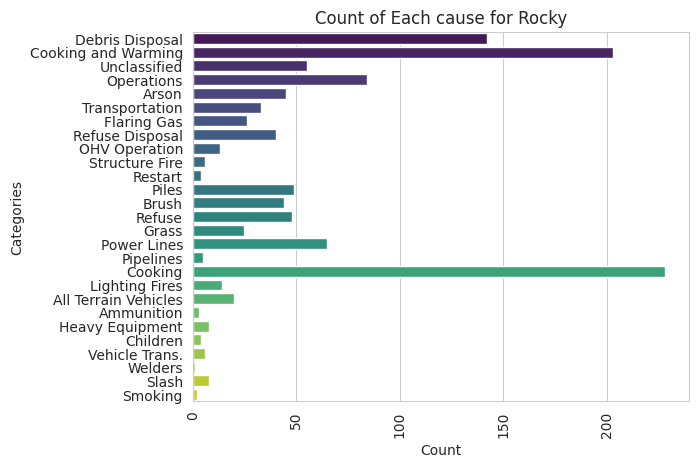

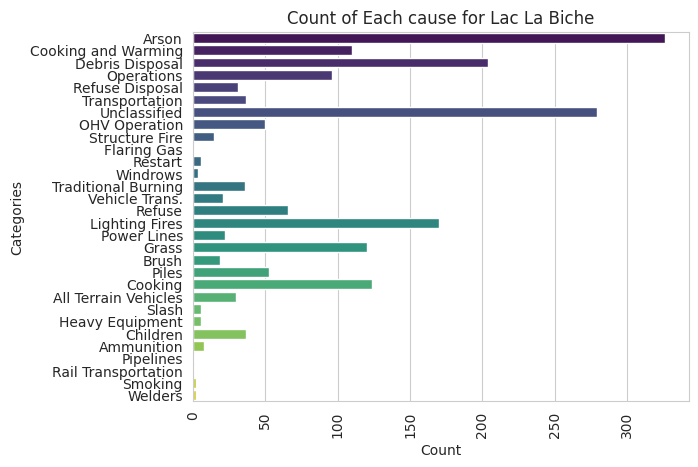

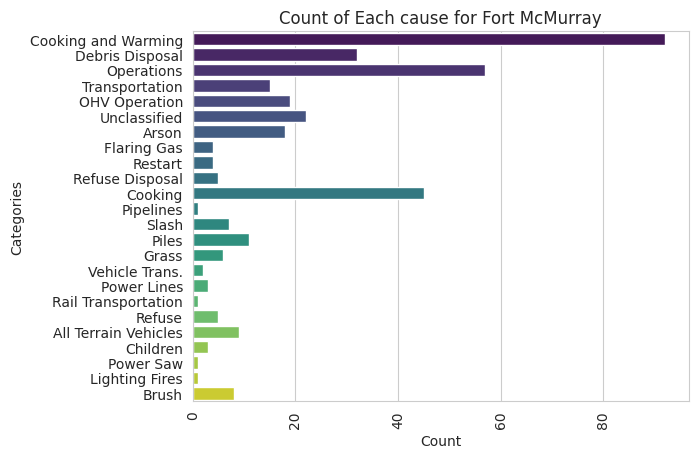

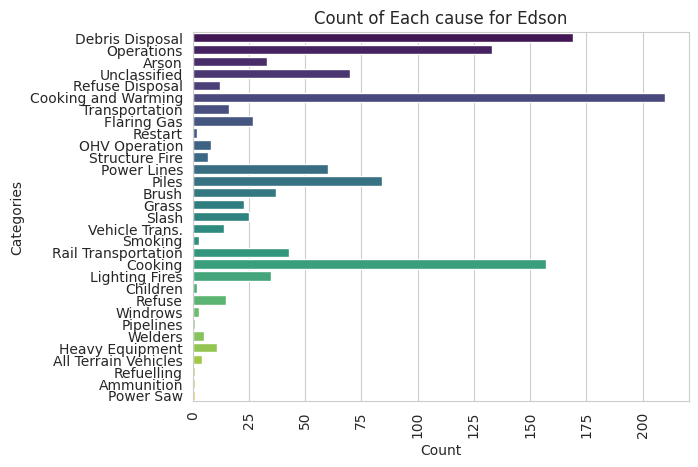

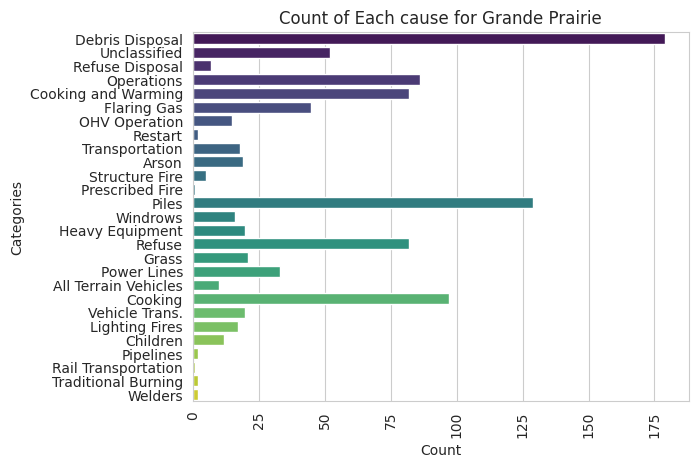

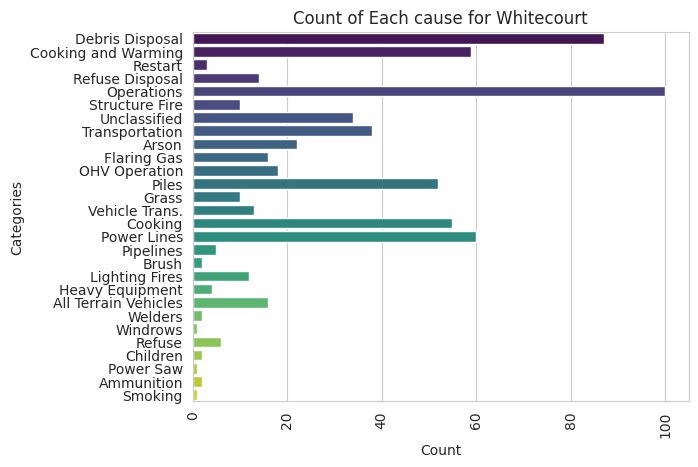

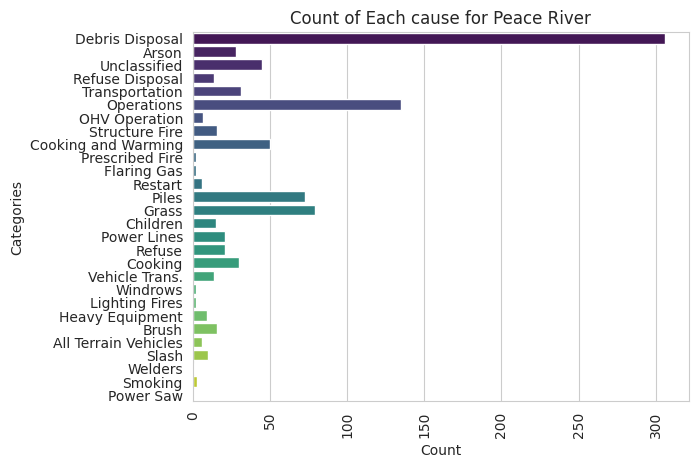

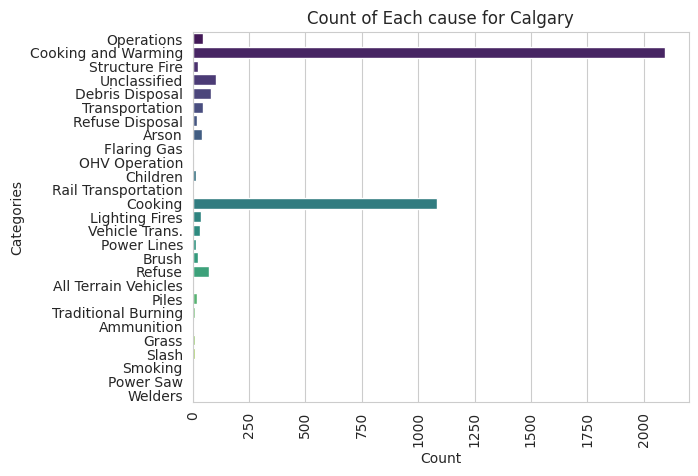

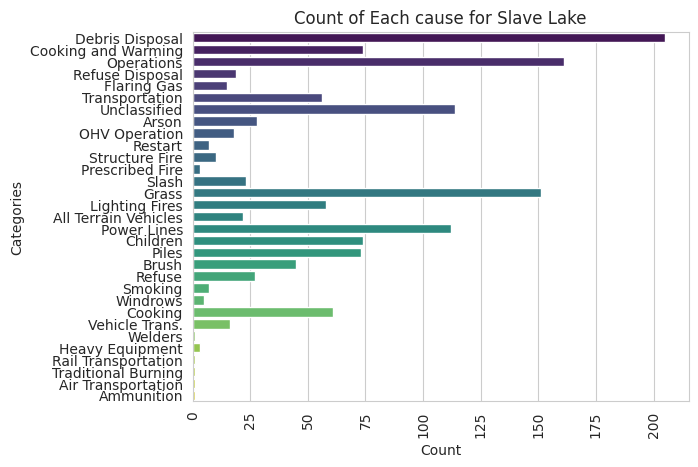

In [ ]:
# feature three : activity_class
for region in FSA_region:
  sns.countplot(data=df[df['FSA']==region], y='activity_class', palette='viridis')
  sns.set_style('whitegrid')

  # Rotate x-axis labels vertically
  plt.xticks(rotation=90)

  plt.ylabel('Categories')
  plt.xlabel('Count')
  plt.title('Count of Each cause for {}'.format(region))
  plt.show()

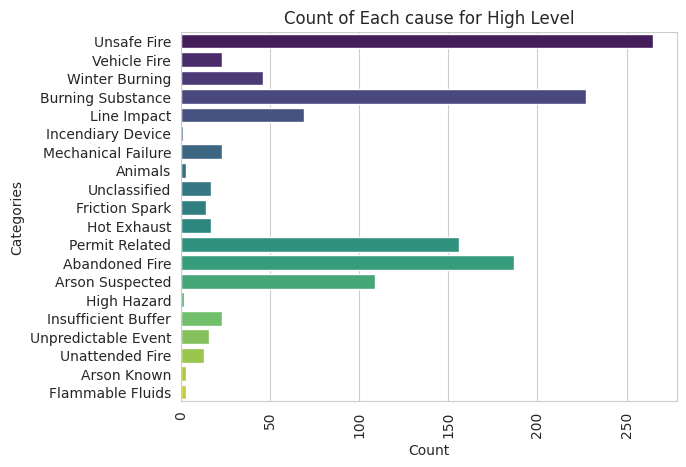

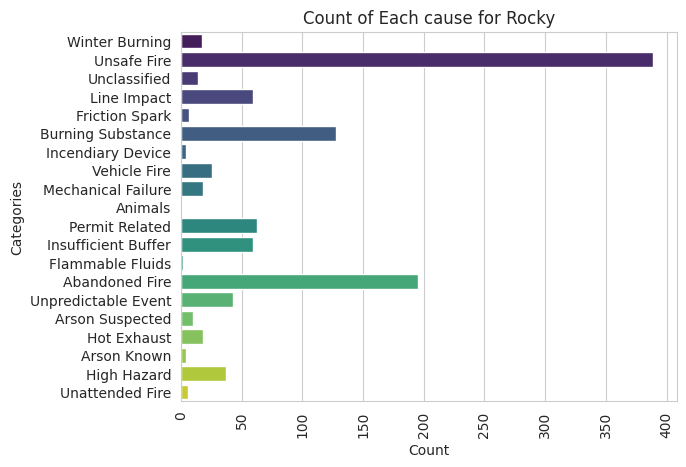

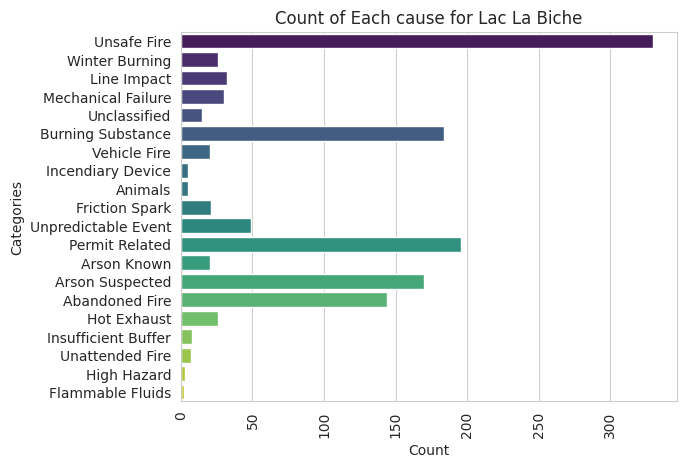

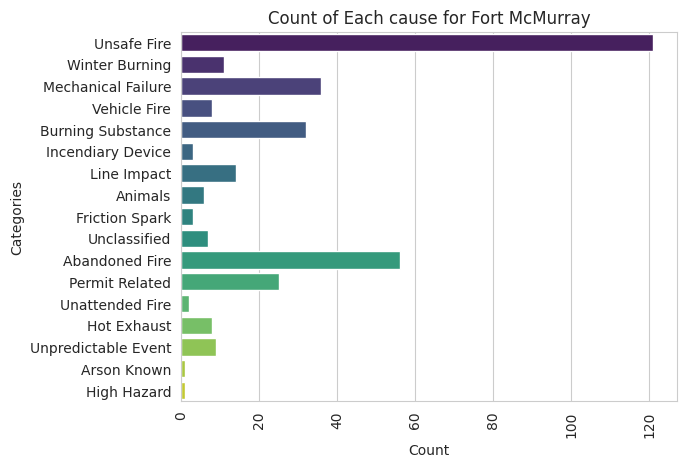

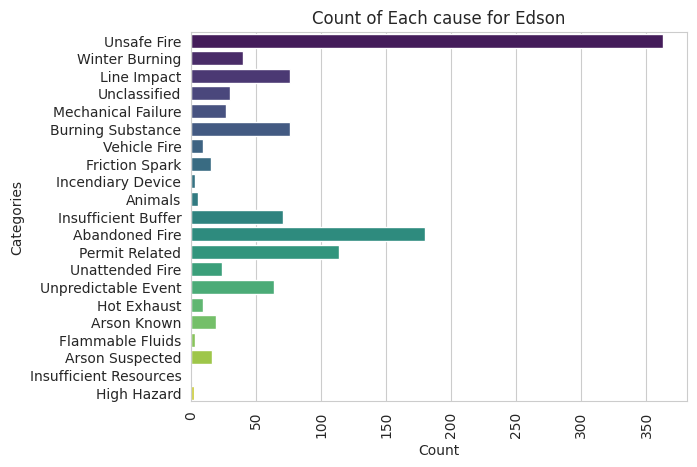

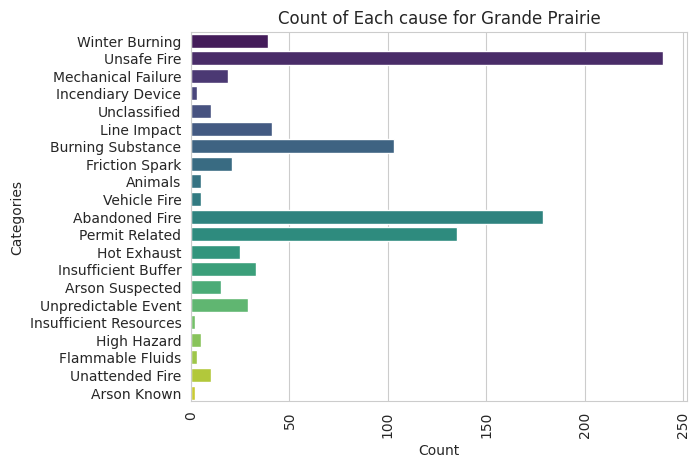

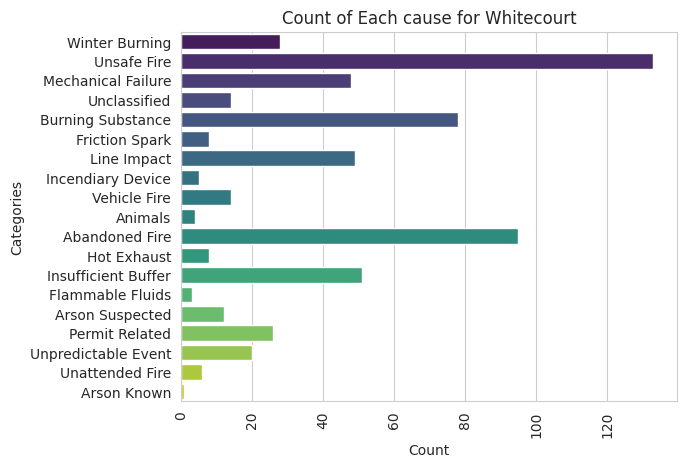

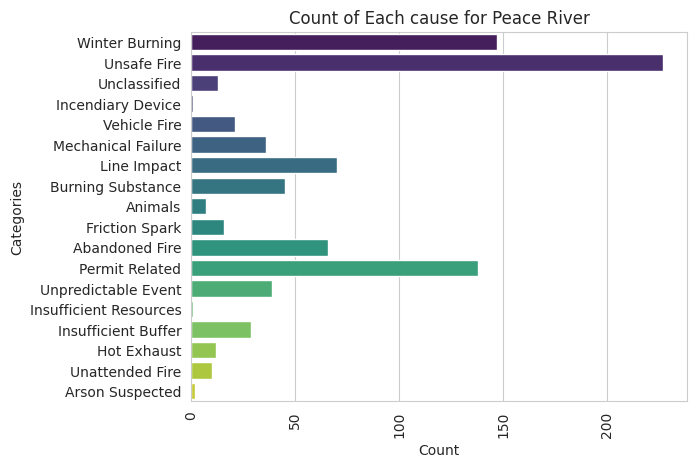

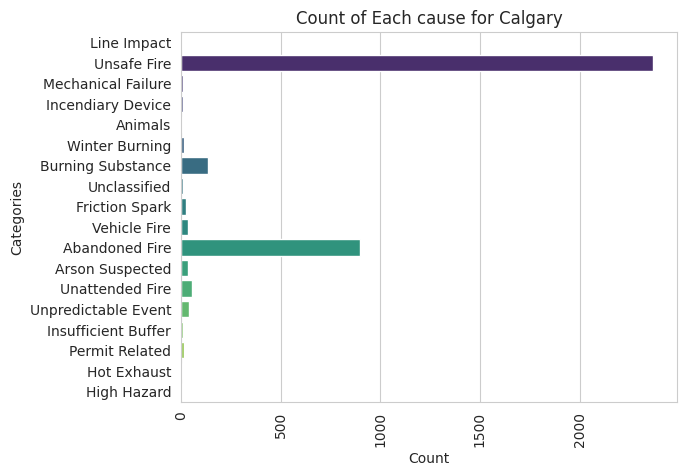

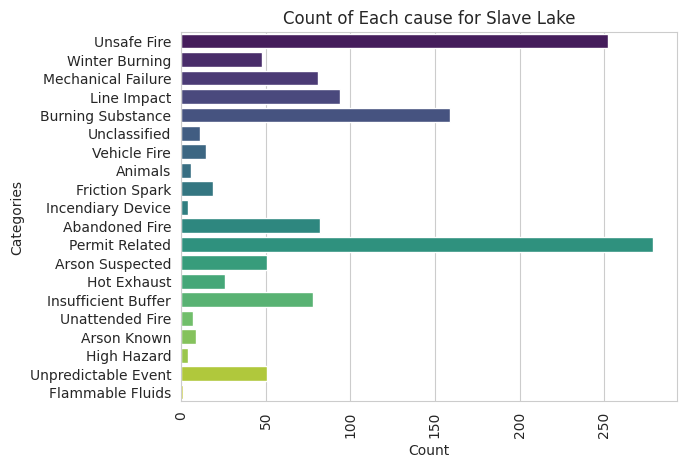

In [ ]:
# feature four : true_cause
for region in FSA_region:
  sns.countplot(data=df[df['FSA']==region], y='true_cause', palette='viridis')
  sns.set_style('whitegrid')

  # Rotate x-axis labels vertically
  plt.xticks(rotation=90)

  plt.ylabel('Categories')
  plt.xlabel('Count')
  plt.title('Count of Each cause for {}'.format(region))
  plt.show()

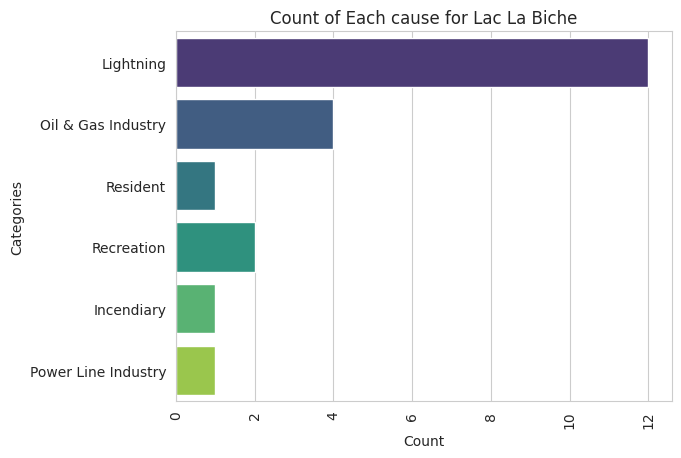

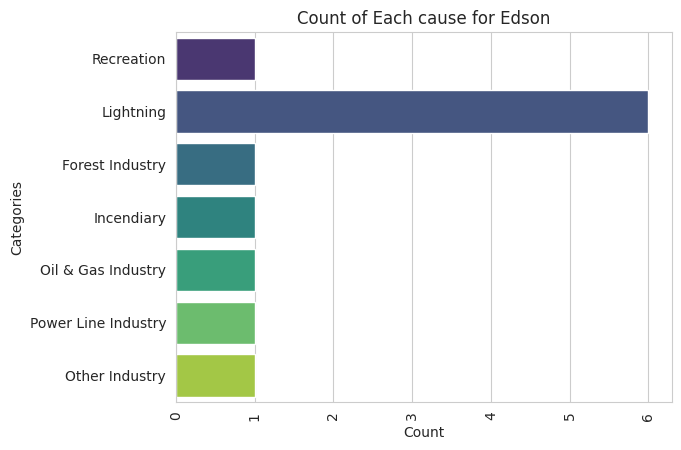

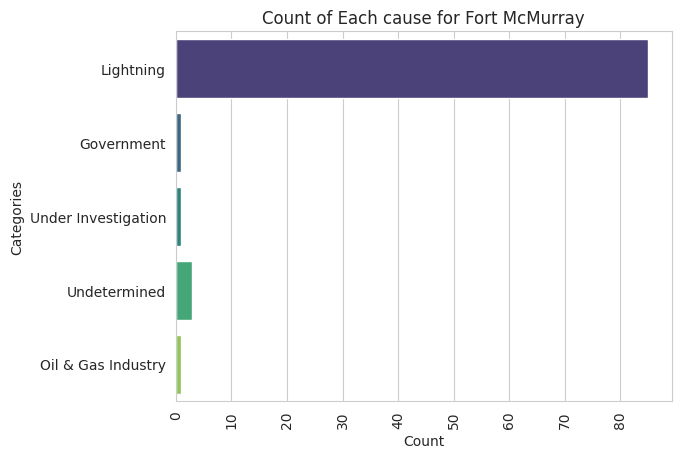

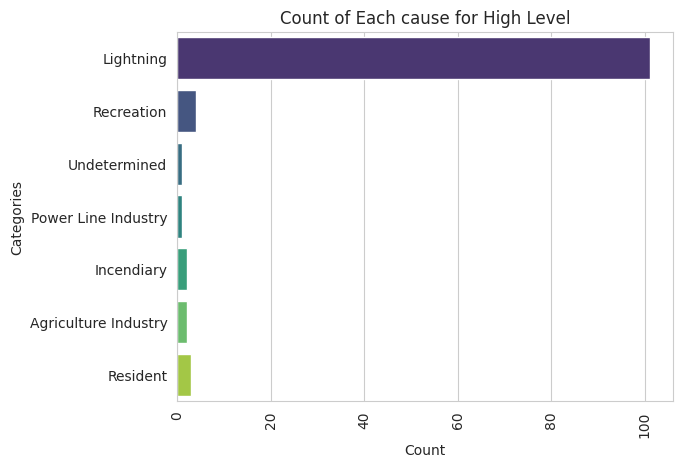

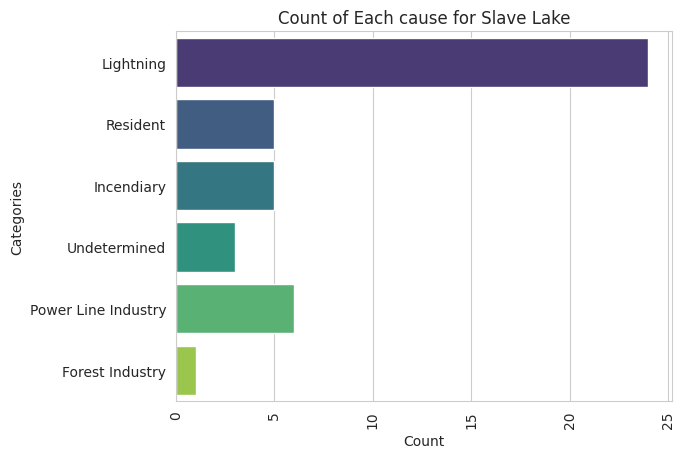

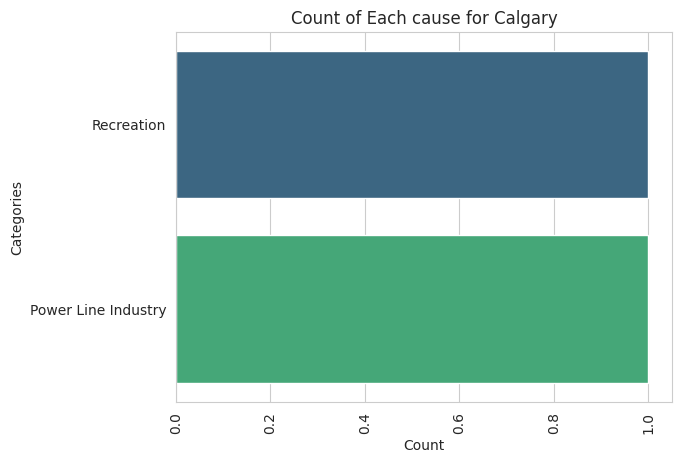

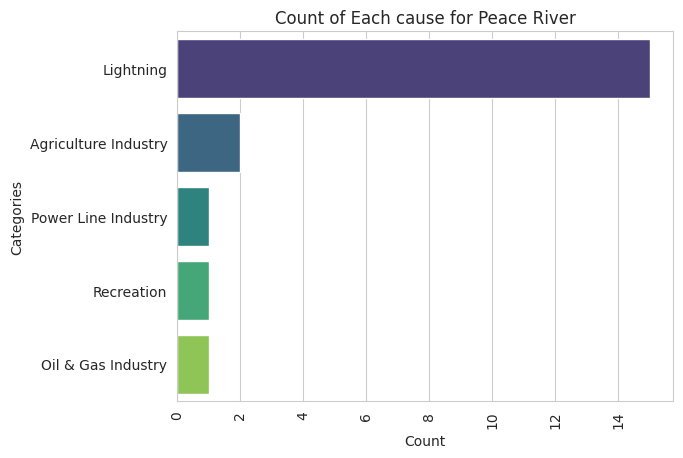

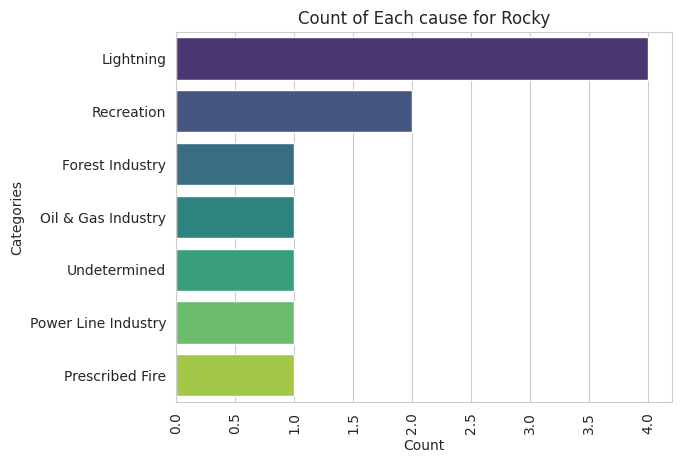

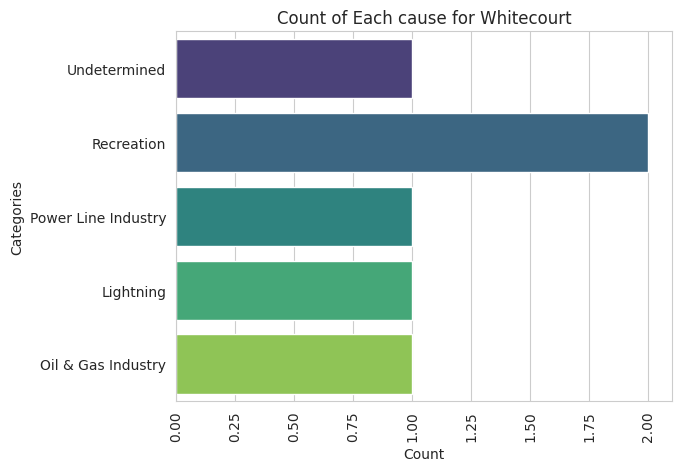

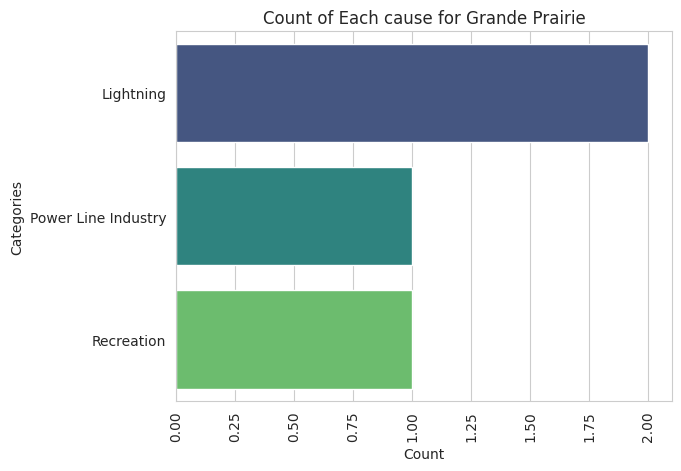

In [ ]:
# Q2b>:And especially analyze the main reasons for the
# wildfires with large burn areas and much bigger impact on environment and residents close by?
# We should repreat the study above but add the constraints
Large_burining = df[df['size_class'] == 'E']

# First way to look at is the col general_cause_description
# Create a count plot for the 'general_cause_desc' column
FSA_region = pd.unique(Large_burining['FSA'])
# We need to use the results from Q1 to shortlist the region

# feature one : general_cause_desc
for region in FSA_region:
  sns.countplot(data=Large_burining[Large_burining['FSA']==region], y='general_cause_desc', palette='viridis')
  sns.set_style('whitegrid')

  # Rotate x-axis labels vertically
  plt.xticks(rotation=90)

  plt.ylabel('Categories')
  plt.xlabel('Count')
  plt.title('Count of Each cause for {}'.format(region))
  plt.show()


# Question 4

In [ ]:
# find out which rows are missing these variates

s = set()
missing_values = ["fire_spread_rate", "weather_conditions_over_fire", "temperature", "relative_humidity", "wind_direction", "wind_speed"]
for key in missing_values:
    s.update(df[df[key].isnull()].index.tolist())

In [ ]:
# drop the missing rows

df_new = df.drop(index = list(s)).reset_index()

In [ ]:
indendent_variables = ["fire_location_latitude", "fire_location_longitude", "general_cause_desc", "FSA",
                       "fire_spread_rate", "assessment_hectares", "weather_conditions_over_fire", "temperature",
                       "relative_humidity", "wind_direction", "wind_speed"]
dependent_variables = "current_size"

In [ ]:
enc = OneHotEncoder()
X = df_new[indendent_variables]
y = df_new[dependent_variables]

# encoding
data = enc.fit_transform(X.select_dtypes(include=[object])).toarray()
encoded = pd.DataFrame(data, columns = enc.get_feature_names_out() + "_encoded", dtype=int)

X = pd.concat([X, encoded], axis = 1)
# drop the nonencoded columns
X = X.select_dtypes(exclude=['object'])

# normalizing
for col in X.columns:
    if "encoded" not in col:
        X[col] = (X[col] - min(X[col])) / (max(X[col]) - min(X[col]))

y = (y - min(y)) / (max(y) - min(y))

In [ ]:
# splitting into training, validating, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, shuffle=True)

In [ ]:
# tuning XGBoost Regressor
model = XGBRegressor()
hyperparameter_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

random_cv = RandomizedSearchCV(estimator=model,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5,
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 9],
                                        'min_child_weight': [1, 10, 100],
                                        'n_estimators': [10, 50, 100]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [ ]:
best_model = random_cv.best_estimator_
best_model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_val, y_val)], eval_metric = 'mae')

[0]	validation_0-mae:0.00066	validation_1-mae:0.00065
[1]	validation_0-mae:0.00065	validation_1-mae:0.00064
[2]	validation_0-mae:0.00064	validation_1-mae:0.00064
[3]	validation_0-mae:0.00064	validation_1-mae:0.00063
[4]	validation_0-mae:0.00063	validation_1-mae:0.00062
[5]	validation_0-mae:0.00063	validation_1-mae:0.00062
[6]	validation_0-mae:0.00063	validation_1-mae:0.00062
[7]	validation_0-mae:0.00063	validation_1-mae:0.00061
[8]	validation_0-mae:0.00063	validation_1-mae:0.00061
[9]	validation_0-mae:0.00063	validation_1-mae:0.00061


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=100, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Text(0.5, 0, 'Epochs')

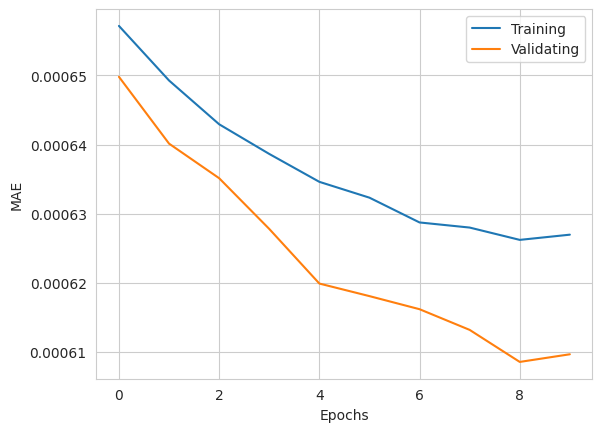

In [ ]:
results = best_model.evals_result()
fig, ax = plt.subplots()
epochs = len(results['validation_0']['mae'])
x_axis = range(epochs)
ax.plot(x_axis, results['validation_0']['mae'], label='Training')
ax.plot(x_axis, results['validation_1']['mae'], label='Validating')
ax.legend()
ax.set_ylabel("MAE")
ax.set_xlabel("Epochs")

<BarContainer object of 48 artists>

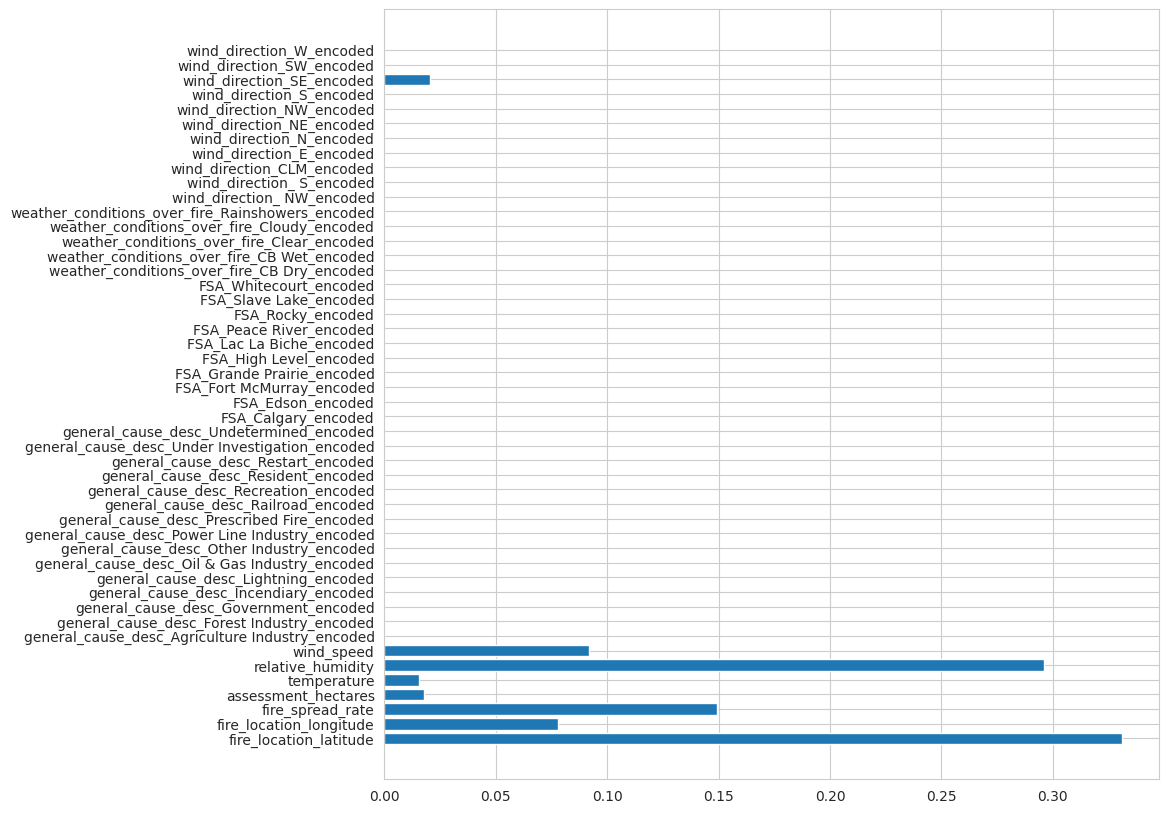

In [ ]:
plt.figure(figsize = (10,10))
plt.barh(X_train.columns, best_model.feature_importances_)

Text(0, 0.5, 'Actual Values')

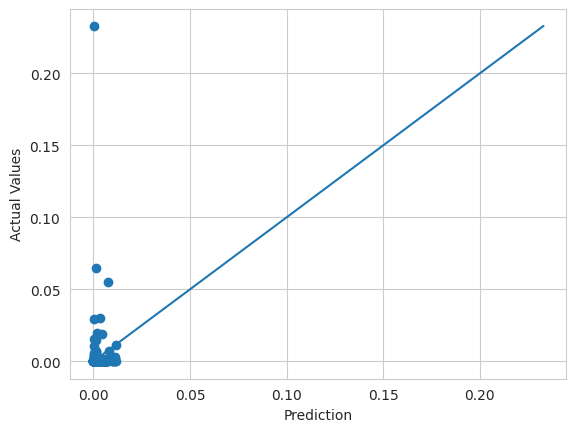

In [ ]:
predict = best_model.predict(X_test)

ident = [min(min(y_test), min(predict)), max(max(y_test), max(predict))]
plt.plot(ident,ident)
plt.scatter(predict, y_test)
plt.xlabel("Prediction")
plt.ylabel("Actual Values")

In [ ]:


mean_absolute_error(predict, y_test)

0.00042764112070951875

In [ ]:

model = Sequential([
    Dense(16, activation='relu'),
    # Dropout(0.2),
    Dense(8, activation='relu'),
   # Dropout(0.2),
    Dense(1, activation='linear')
])

optimizer = Adam()
model.compile(optimizer=optimizer,
              loss='mean_absolute_error',
              metrics=['mae'])

In [ ]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data = (X_val, y_val))

Epoch 1/50
380/380 [==============================] - 7s 10ms/step - loss: 0.0177 - mae: 0.0177 - val_loss: 0.0037 - val_mae: 0.0037
Epoch 2/50
380/380 [==============================] - 3s 7ms/step - loss: 0.0021 - mae: 0.0021 - val_loss: 0.0014 - val_mae: 0.0014
Epoch 3/50
380/380 [==============================] - 2s 6ms/step - loss: 8.7591e-04 - mae: 8.7591e-04 - val_loss: 6.6564e-04 - val_mae: 6.6564e-04
Epoch 4/50
380/380 [==============================] - 2s 6ms/step - loss: 6.4955e-04 - mae: 6.4955e-04 - val_loss: 9.9034e-04 - val_mae: 9.9034e-04
Epoch 5/50
380/380 [==============================] - 3s 8ms/step - loss: 5.5935e-04 - mae: 5.5935e-04 - val_loss: 5.5943e-04 - val_mae: 5.5943e-04
Epoch 6/50
380/380 [==============================] - 4s 11ms/step - loss: 5.1874e-04 - mae: 5.1874e-04 - val_loss: 5.8606e-04 - val_mae: 5.8606e-04
Epoch 7/50
380/380 [==============================] - 1s 3ms/step - loss: 5.0244e-04 - mae: 5.0244e-04 - val_loss: 4.4292e-04 - val_mae: 4.429

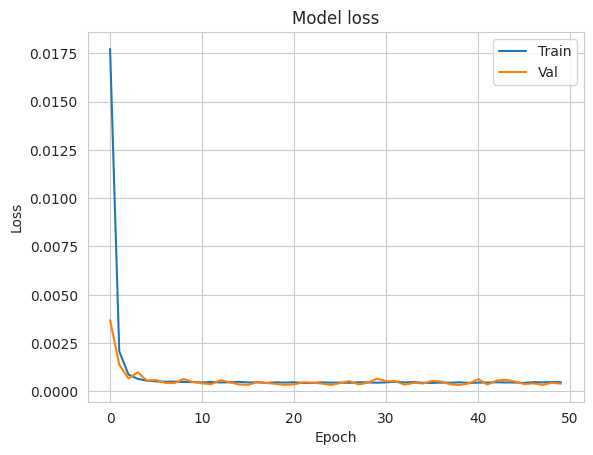

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
predict = model.predict(X_test)

127/127 [==============================] - 1s 3ms/step


In [ ]:
mean_absolute_error(predict, y_test)

0.00024254444127843613

Text(0, 0.5, 'Actual Values')

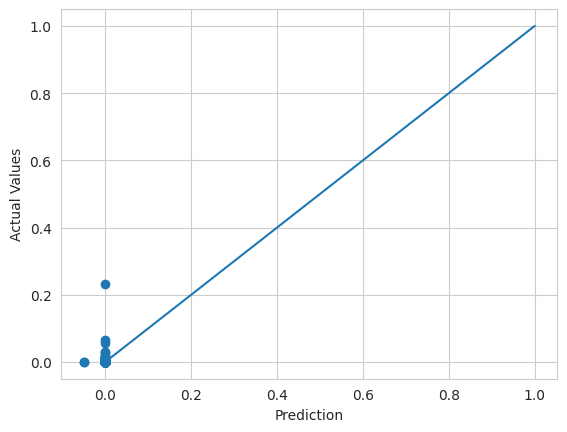

In [ ]:
ident = [0, 1]
plt.plot(ident,ident)
plt.scatter(predict, y_test)
plt.xlabel("Prediction")
plt.ylabel("Actual Values")